# 04. XGBoost

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import xgboost as xgb
from sklearn import metrics
import graphviz

## Read data

In [103]:
train = pd.read_csv("../data/processed/original/train50.csv")
test = pd.read_csv("../data/processed/original/test50.csv")

In [104]:
train

,Shared_Markers,k0,k1,k2,Share_allele,Value,True_positive,Marcadores,Software,Datos,Kinship,File,Hoja,Sheet,Value_range,FAM_Sample_info_id,FAM_Sample_info_rel,VIC_Sample_info_id,VIC_Sample_info_rel
0,15,0,4,11,26,236354.0000,False,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,100000-999999,12102,F,65402,F
1,15,0,7,8,23,184374.0000,False,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,100000-999999,23802,S,99602,F
2,15,0,6,9,24,83900.6000,False,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,10000-99999,47302,S,62402,F
3,15,0,10,5,20,41143.0000,False,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,10000-99999,116102,F,116702,F
4,15,0,8,7,22,30327.8000,False,15,BlindSeach,Simulados,Paternidad,15_BlindSeach_Simulados_Paternidad_allele,ipi-1,1:749,10000-99999,122502,F,83702,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35304,14,1,9,5,19,98.0285,False,15,BlindSearch,Simulados,Hermandad,15_BlindSearch_Simulados_Hermandad_allele,isib-375,375:375,0-99,141201,U,3201,S
35305,12,3,6,6,18,97.8114,False,15,BlindSearch,Simulados,Hermandad,15_BlindSearch_Simulados_Hermandad_allele,isib-375,375:375,0-99,27401,S,57902,S
35306,13,2,6,7,20,97.4719,False,15,BlindSearch,Simulados,Hermandad,15_BlindSearch_Simulados_Hermandad_allele,isib-375,375:375,0-99,2101,S,21001,U
35307,12,3,4,8,20,96.5641,False,15,BlindSearch,Simulados,Hermandad,15_BlindSearch_Simulados_Hermandad_allele,isib-375,375:375,0-99,123601,S,88301,U


In [105]:
# Declare feature and label columns
feature_columns = ["Shared_Markers", "k0", "k1", "k2", "Share_allele", "Value"]
label_columns = ["True_positive"]

In [106]:
# Select feature and label columns
X_train = train[feature_columns]
y_train = train[label_columns]

X_test = test[feature_columns]
y_test = test[label_columns]

## Train XGBoost

In [107]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

### Feature Importance

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

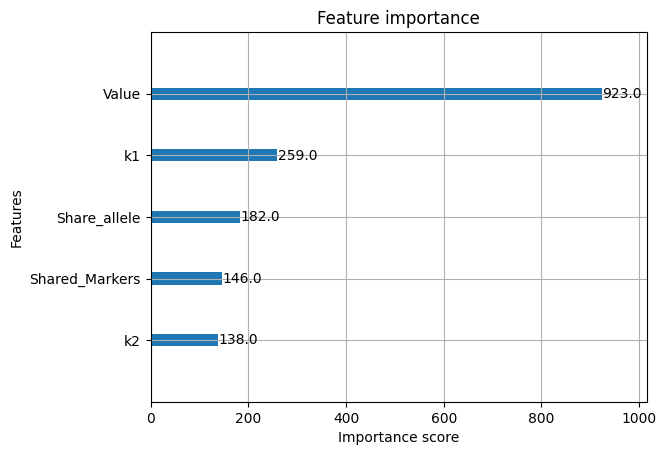

In [108]:
xgb.plot_importance(model)

In [109]:
model_importance = pd.DataFrame(list(model.get_booster().get_fscore().items()),
columns = ['feature','importance']).sort_values('importance', ascending = False)
print('', model_importance)

           feature  importance
4           Value       923.0
1              k1       259.0
3    Share_allele       182.0
0  Shared_Markers       146.0
2              k2       138.0


### Árbol de Ejemplo

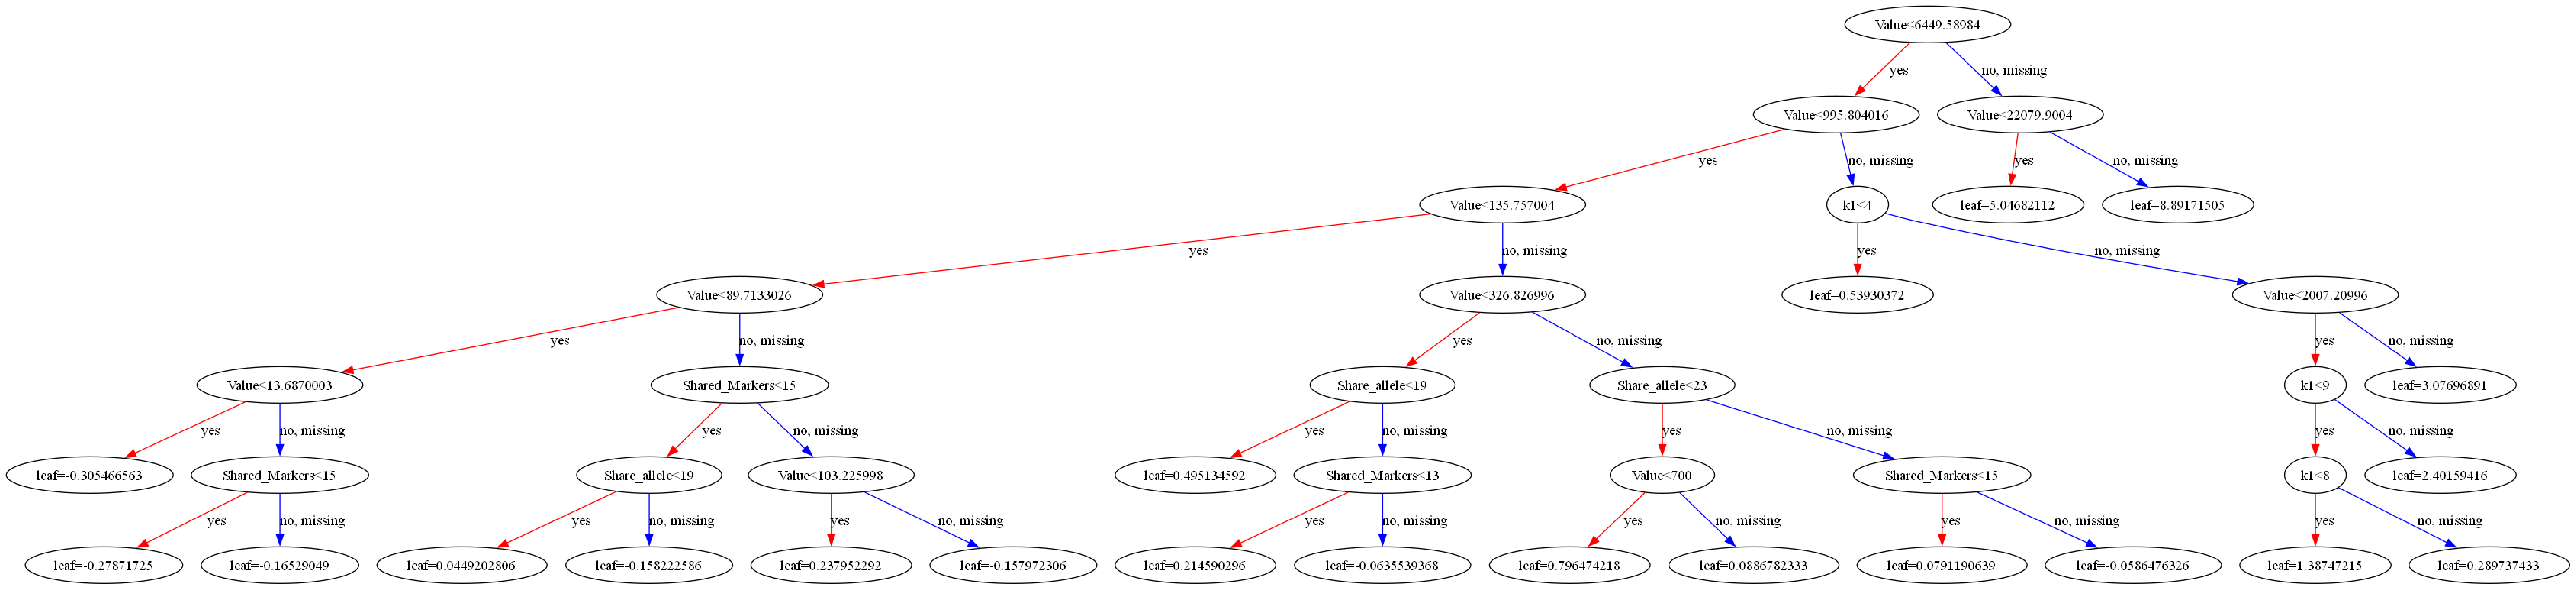

In [110]:
xgb.plot_tree(model, tree_idx = 0)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)

### Mostrar una Proyección de la Función Aprendida por el Árbol

In [ ]:
index_to_study = 2
proj_range = list(range(0, 20000))

df_range = pd.DataFrame(np.stack((X_train.iloc[index_to_study, :].values, ) * len(proj_range), axis = 0),
                        columns = X_train.columns)
df_range["Value"] = proj_range

,Shared_Markers,k0,k1,k2,Share_allele,Value
0,15.0,0.0,6.0,9.0,24.0,0
1,15.0,0.0,6.0,9.0,24.0,1
2,15.0,0.0,6.0,9.0,24.0,2
3,15.0,0.0,6.0,9.0,24.0,3
4,15.0,0.0,6.0,9.0,24.0,4
...,...,...,...,...,...,...
19995,15.0,0.0,6.0,9.0,24.0,19995
19996,15.0,0.0,6.0,9.0,24.0,19996
19997,15.0,0.0,6.0,9.0,24.0,19997
19998,15.0,0.0,6.0,9.0,24.0,19998


Text(0, 0.5, 'Predicción')

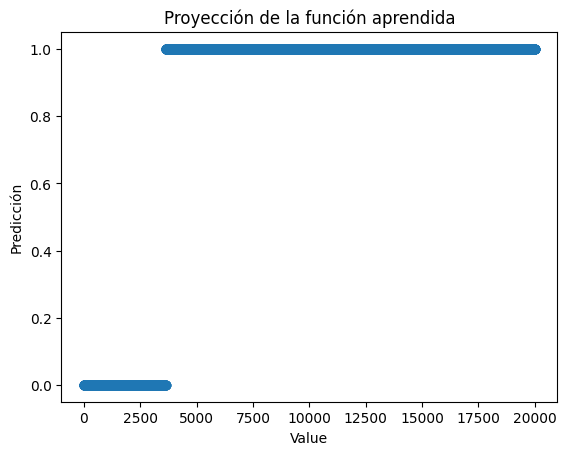

In [112]:
aux_out = model.predict(df_range)
plt.scatter(proj_range, aux_out)

plt.title("Proyección de la función aprendida")
plt.xlabel("Value")
plt.ylabel("Predicción")


### Evaluar la Capacidad de Aprendizaje

In [113]:
y_train_pred = model.predict(X_train)

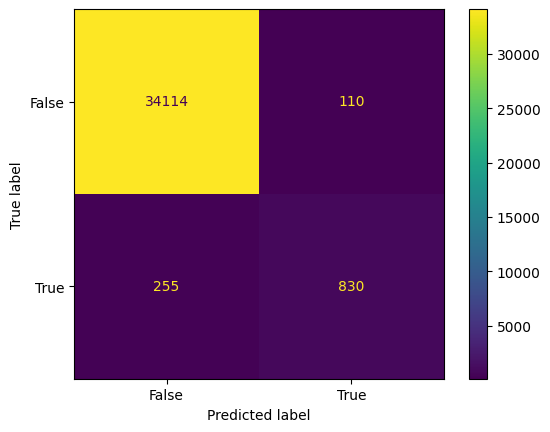

In [114]:
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [115]:
print(metrics.classification_report(y_train, y_train_pred, target_names = ["NO Parentesco", "Parentesco"]))

               precision    recall  f1-score   support

NO Parentesco       0.99      1.00      0.99     34224
   Parentesco       0.88      0.76      0.82      1085

     accuracy                           0.99     35309
    macro avg       0.94      0.88      0.91     35309
 weighted avg       0.99      0.99      0.99     35309



## Predict with XGBoost

In [116]:
y_pred = model.predict(X_test)

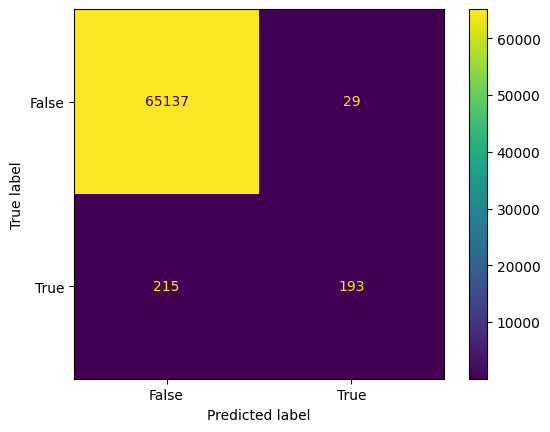

In [117]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [118]:
print(metrics.classification_report(y_test, y_pred, target_names = ["NO Parentesco", "Parentesco"]))

               precision    recall  f1-score   support

NO Parentesco       1.00      1.00      1.00     65166
   Parentesco       0.87      0.47      0.61       408

     accuracy                           1.00     65574
    macro avg       0.93      0.74      0.81     65574
 weighted avg       1.00      1.00      1.00     65574



## Hyperparameter Tuning with Grid Search

In [119]:
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [120]:
def timer(start_time = None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [121]:
params = {
        'min_child_weight': [1, 3, 5, 10, 20],
        'max_depth': [1, 2, 3, 5, 10, 15],
        'n_estimators': [100, 250, 500, 1000],
        'booster': ["gbtree", "gblinear", "dart"],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'colsample_bytree': [0.6, 0.8, 1.0]
        }

In [122]:
model = xgb.XGBClassifier(learning_rate = 0.005,
                          silent = True,
                          nthread = -1)

In [ ]:
folds = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 31)

grid_search = GridSearchCV(model, param_grid = params, scoring='roc_auc', n_jobs=4, cv = skf.split(X_train, y_train), verbose=3)

# Begin grid search
start_time = timer(None)
grid_search.fit(X_train, y_train)
timer(start_time)

Fitting 5 folds for each of 5400 candidates, totalling 27000 fits


In [ ]:
print('\n Best normalized gini score for %d-fold search.' % (folds))
print(grid_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(grid_search.best_params_)
results = pd.DataFrame(grid_search.cv_results_)
results.to_csv('xgb-grid-search-results-01.csv', index=False)


 Best normalized gini score for 5-fold search.
0.9783068270320254

 Best hyperparameters:
{'max_depth': 2, 'min_child_weight': 10, 'n_estimators': 500}


### Predict with the best model

In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

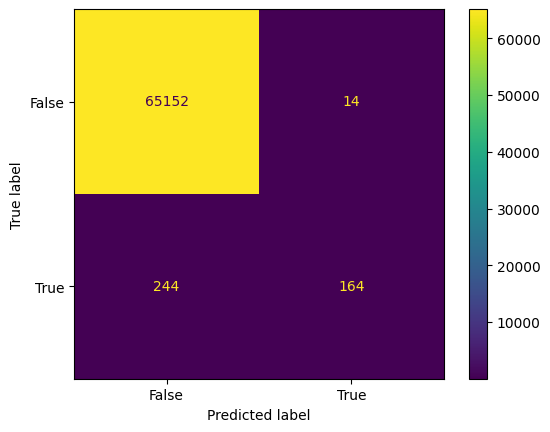

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred, target_names = ["NO Parentesco", "Parentesco"]))

               precision    recall  f1-score   support

NO Parentesco       1.00      1.00      1.00     65166
   Parentesco       0.92      0.40      0.56       408

     accuracy                           1.00     65574
    macro avg       0.96      0.70      0.78     65574
 weighted avg       1.00      1.00      1.00     65574



## Save Model